In [25]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt

#set random seed
random.seed(42)

In [15]:
import pandas as pd

# Load the CSV
df = pd.read_csv('NHANES.csv')

# Check that it loaded
print(df.head())

      SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92  


In [18]:
y = df['age_group']
X = df.drop(columns=['RIDAGEYR', 'age_group'], errors='ignore')  # drop age_group if it exists

In [19]:
X.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [20]:
y.head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: age_group, dtype: object

<Axes: >

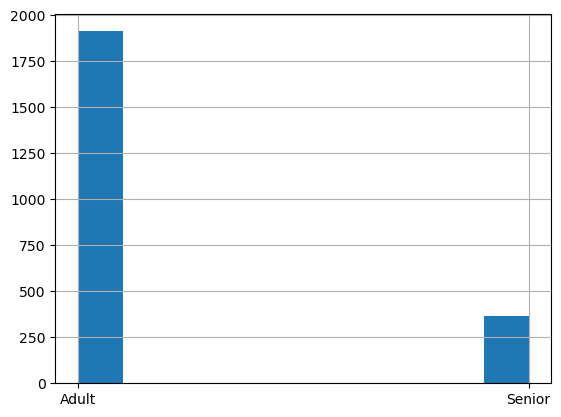

In [21]:
y.hist()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

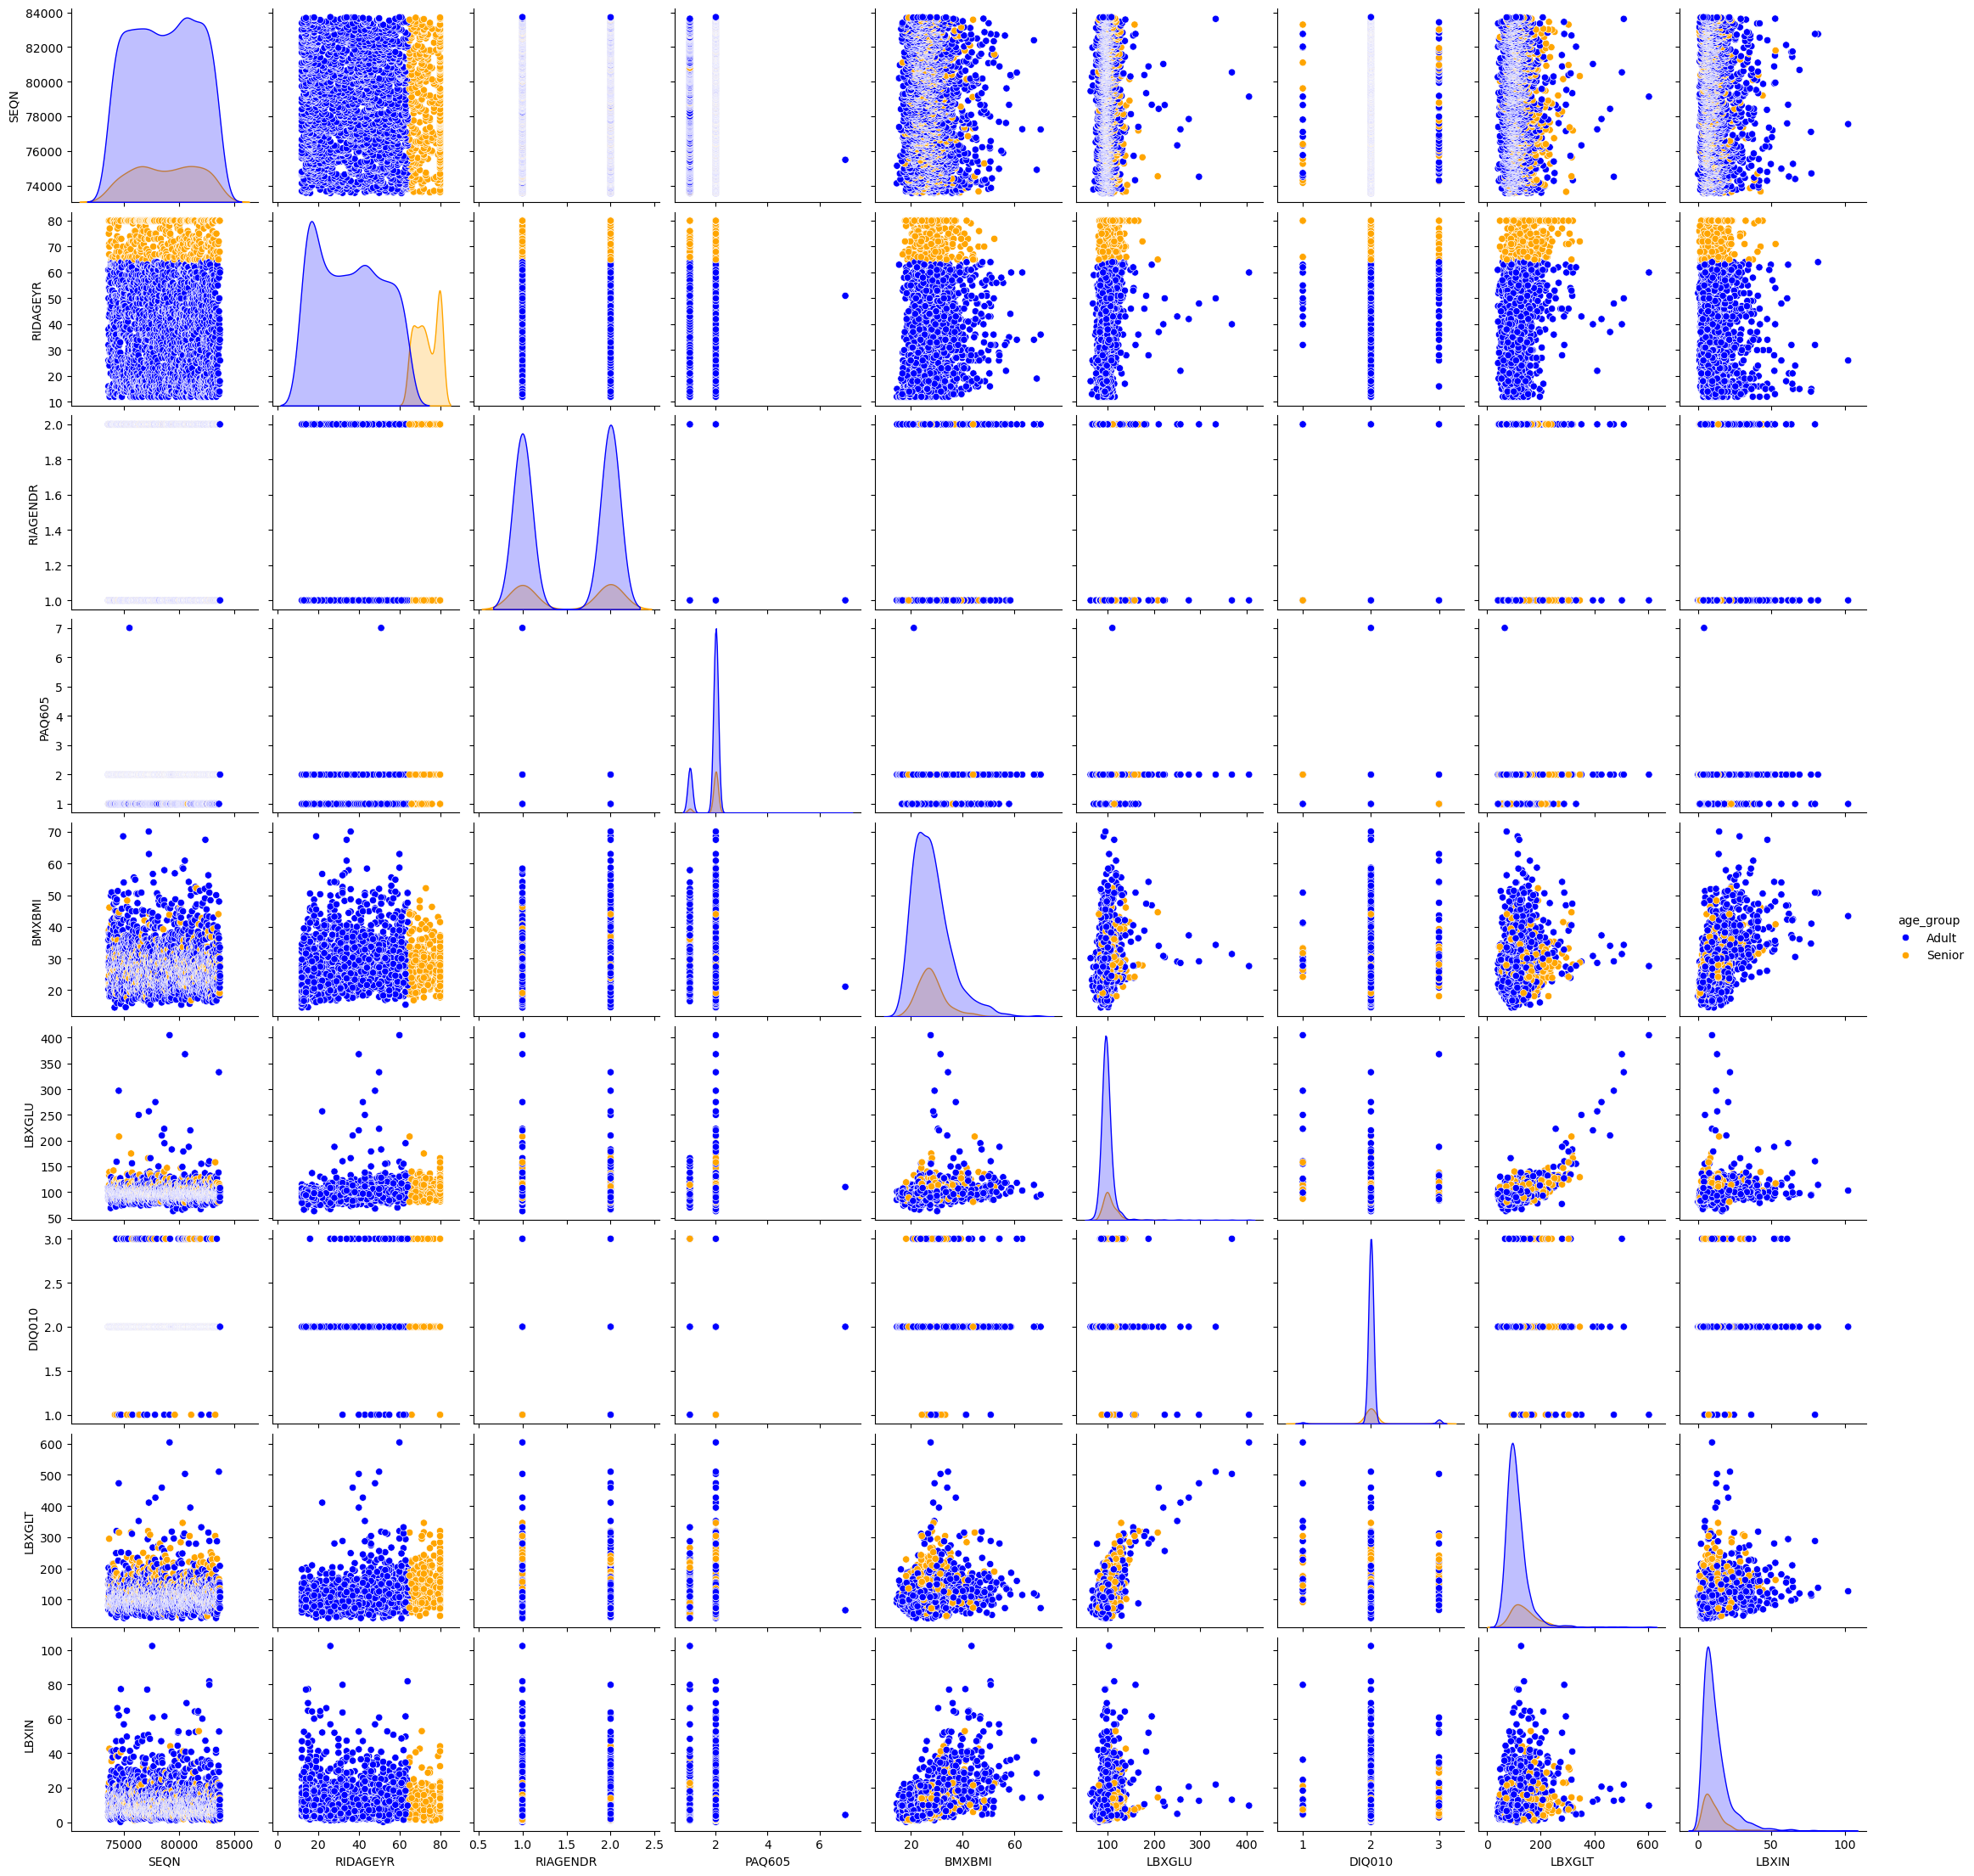

In [23]:
#Make a pairplot with target variable of CH being represented by orange and MM being represented by blue
sns.pairplot(df, hue='age_group', palette={'Adult': 'blue', 'Senior': 'orange'})
plt.show()

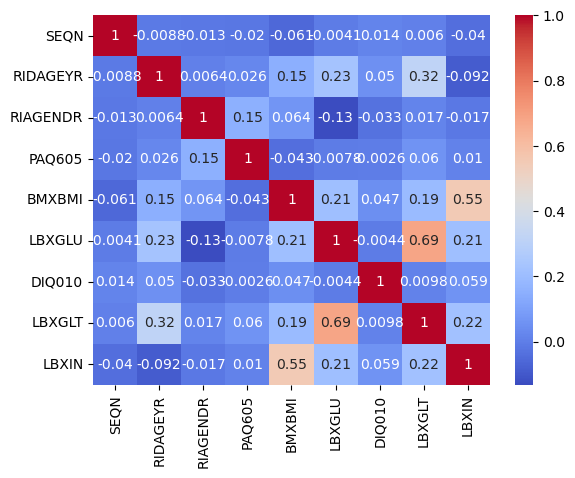

In [24]:
# make correlation matrix with numeric variables
corr = df.drop(columns=['age_group']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()   

Do KNN model

Scikit-learn k-NN Accuracy: 0.84
Confusion Matrix:
 [[83  3]
 [13  1]]


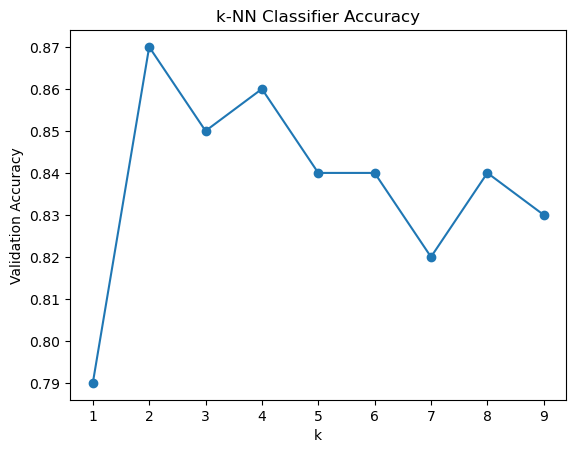

In [33]:
import random

# Set the seed to a specific value (e.g., 42)
random.seed(42)

#new with knn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 
#To make the validation set 20% of the original data we use test size 0.25 as 0.25*0.8=0.2

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#since knn big and omp expensive split to smaller
X_val_subset = random.sample(list(X_val), 100)
y_val_subset = random.sample(list(y_val), 100)

from sklearn import neighbors

#run knn
knn = neighbors.KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_sklearn_knn = knn.predict(X_val_subset)
sklearn_accuracy = np.mean(y_pred_sklearn_knn == y_val_subset)
print(f'Scikit-learn k-NN Accuracy: {sklearn_accuracy:.2f}')
con_mat = confusion_matrix(y_val_subset, y_pred_sklearn_knn)
print('Confusion Matrix:\n', con_mat)

#plot knn
k_values = range(1, 10)
accuracies = []
for k in k_values:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_val_subset)
    accuracy = np.mean(y_pred_knn == y_val_subset)
    accuracies.append(accuracy)
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('k-NN Classifier Accuracy')
plt.show()

Do Logistic regression model

In [36]:
#New logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_sklearn)
print(f'Logistic Regression Accuracy (Sklearn): {accuracy:.2f}')
confusion_matrix(y_val, y_pred_sklearn)

Logistic Regression Accuracy (Sklearn): 0.82


array([[369,   6],
       [ 76,   5]])

In [37]:
#These two lines recombine the training and validation sets to train the model on the full training set:
X_train_full = np.concatenate((X_train, X_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)


model.fit(X_train_full, y_train_full)
X_test_log = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Logistic Regression Test Accuracy: {test_accuracy:.2f}')
confusion_matrix(y_test, y_pred_test)

Logistic Regression Test Accuracy: 0.83


array([[375,   7],
       [ 69,   5]])

Try LDA

In [38]:

y_LDA = df['age_group']

#i want to do LDA so transform target to 'Senior' = 1 and 'Adult' = 0 with
y_LDA = np.where(y_LDA == 'Senior', 1, 0)
X_LDA = df.drop(columns=['RIDAGEYR', 'age_group'], errors='ignore')  # drop age_group if it exists

#Now we split the data into training and testing sets
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_LDA, y_LDA, test_size=0.2, random_state=42)

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Implement LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_LDA, y_train_LDA)

# Predictions
y_train_pred = lda.predict(X_train_LDA)
y_test_pred = lda.predict(X_test_LDA)

# Accuracy
train_accuracy = accuracy_score(y_train_LDA, y_train_pred)
test_accuracy = accuracy_score(y_test_LDA, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Train accuracy: 0.8419319429198683
Test accuracy: 0.8355263157894737


Try decision tree and random forest classifier models including cross validation

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

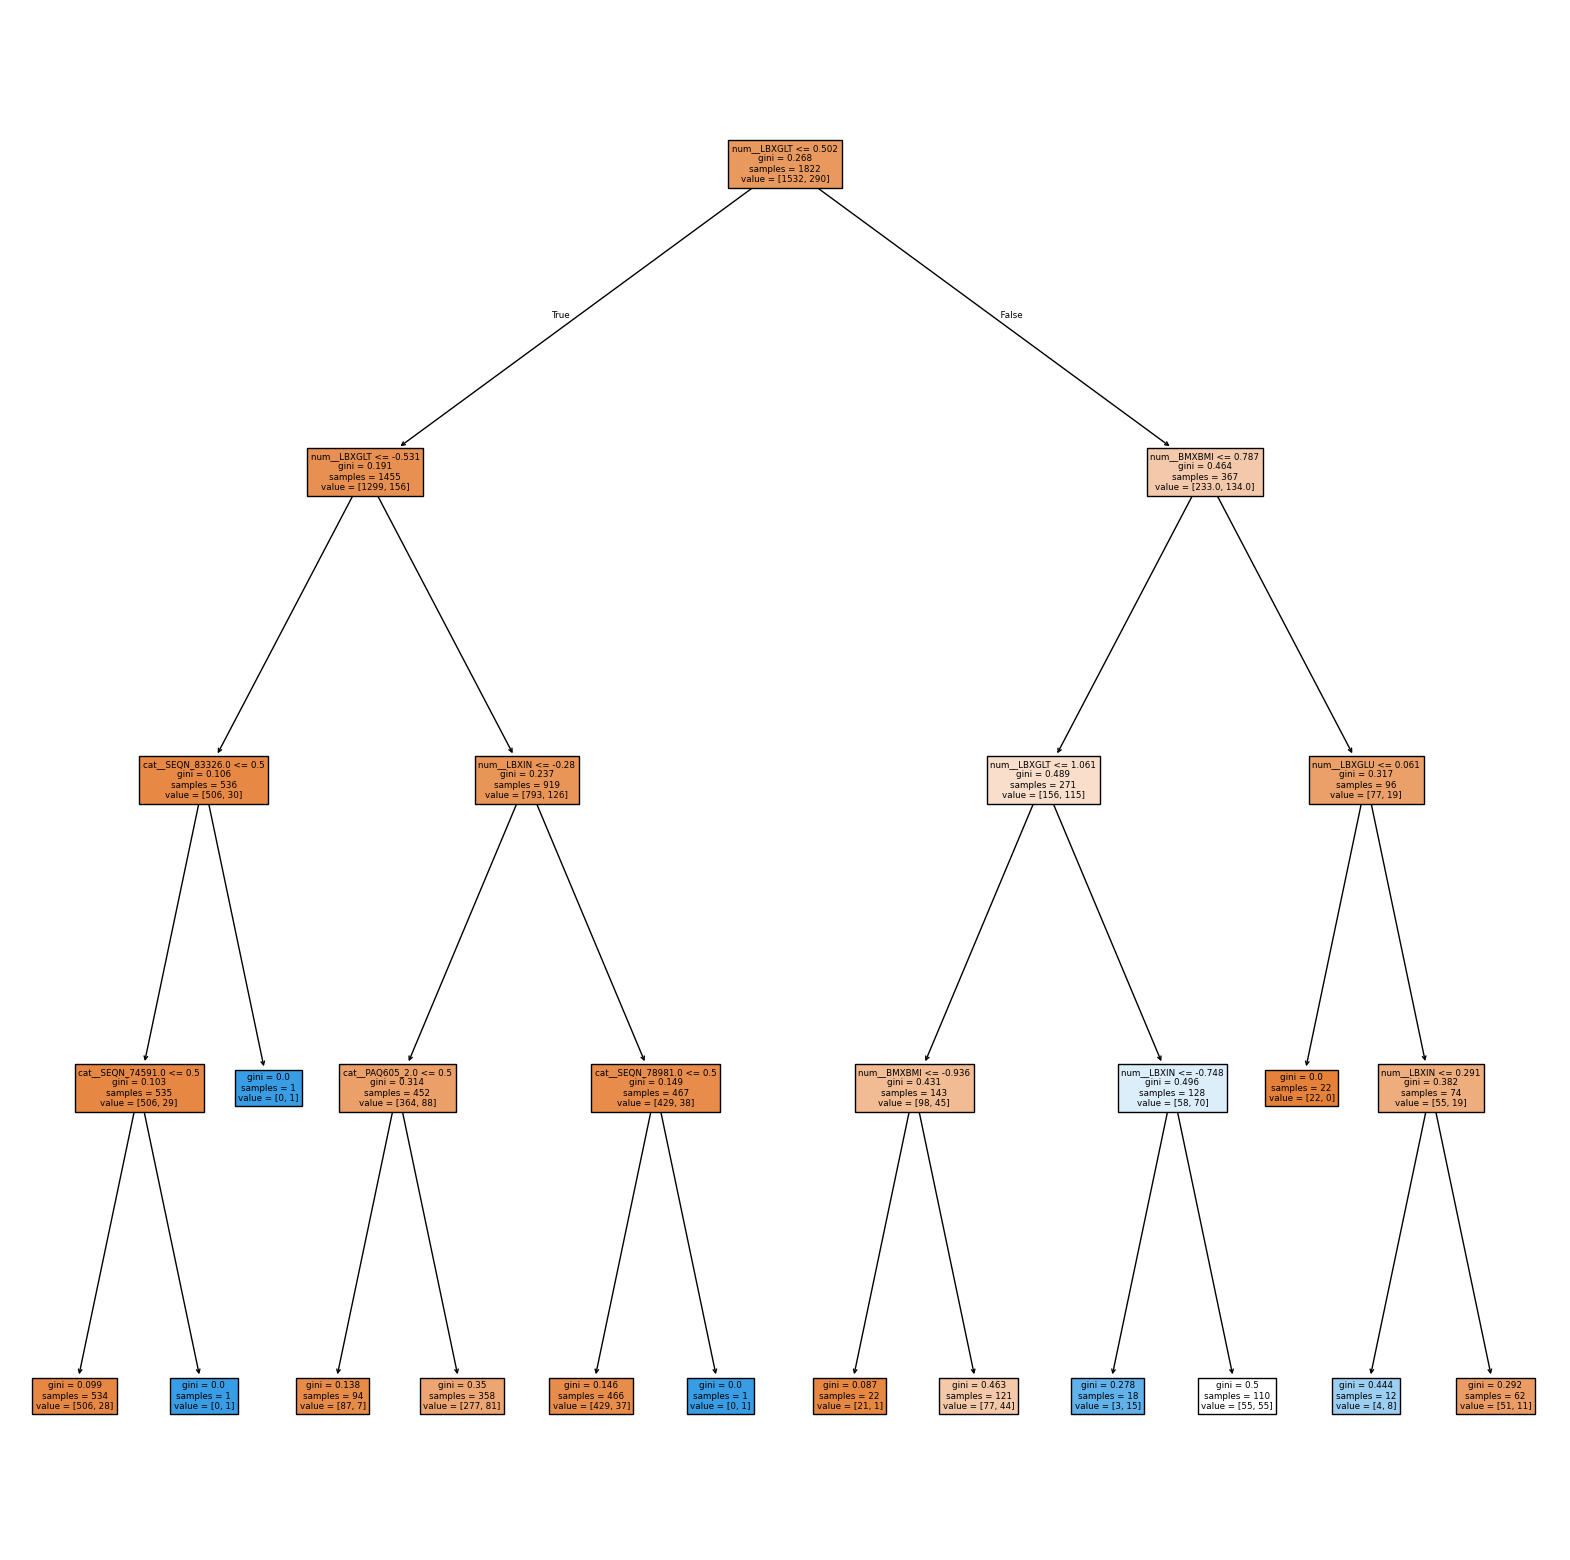

In [61]:
y_rf = df['age_group']
X_rf = df.drop(columns=['RIDAGEYR', 'age_group'], errors='ignore')

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)


# Preprocessors for numerical and categorical data
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output= False), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

#Use the preprocessor to transform the data
X_train_rf = preprocessor.fit_transform(X_train_rf)
X_test_rf = preprocessor.transform(X_test_rf)

dt_model = DecisionTreeClassifier(max_depth = 4,random_state=42)
dt_model.fit(X_train_rf, y_train_rf)
dt_pred = dt_model.predict(X_test_rf)

#Display the decision tree
plt.figure(figsize=(20,20))
plot_tree(dt_model, feature_names = preprocessor.get_feature_names_out(), filled=True)
plt.show()

In [62]:
dt_cv_scores = cross_val_score(dt_model, X_train_rf, y_train_rf, cv=10)
print("Mean 10-Fold CV Score: ", np.mean(dt_cv_scores))

print("Decision Tree Classifier")
print("Accuracy: ", accuracy_score(y_test_rf, dt_pred))

Mean 10-Fold CV Score:  0.8391851318080826
Decision Tree Classifier
Accuracy:  0.8333333333333334


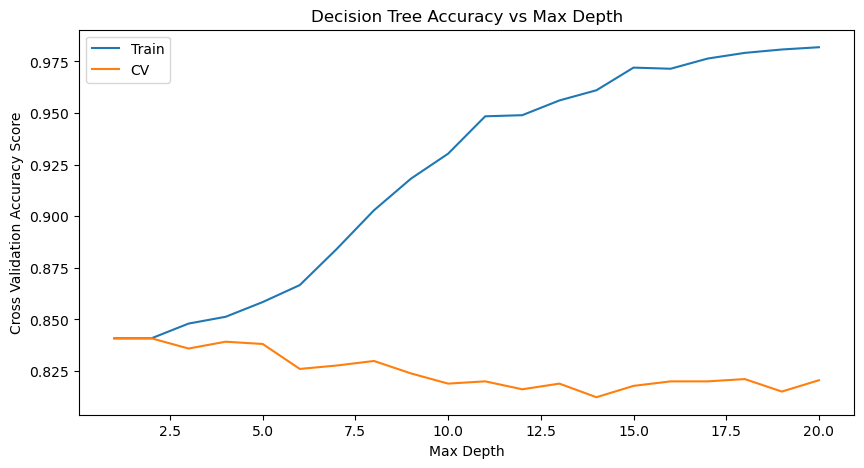

In [63]:
depths = np.arange(1, 21)
dt_train_scores = []
dt_cv_scores = []

for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train_rf, y_train_rf)
    dt_train_pred = dt_model.predict(X_train_rf)
    dt_train_scores.append(accuracy_score(y_train_rf, dt_train_pred))
    dt_cv_scores.append(np.mean(cross_val_score(dt_model, X_train_rf, y_train_rf, cv=10)))
    
plt.figure(figsize=(10,5))
plt.plot(depths, dt_train_scores, label='Train')
plt.plot(depths, dt_cv_scores, label='CV')
plt.xlabel('Max Depth')
plt.ylabel('Cross Validation Accuracy Score')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()

Random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the Random Forest
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict and evaluate
rf_pred = rf_model.predict(X_test_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test_rf, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

       Adult       0.84      0.99      0.91       382
      Senior       0.00      0.00      0.00        74

    accuracy                           0.83       456
   macro avg       0.42      0.50      0.45       456
weighted avg       0.70      0.83      0.76       456



In [65]:
print(y_train_rf.value_counts())

age_group
Adult     1532
Senior     290
Name: count, dtype: int64


In [66]:
#use this version weighing seniors heavier
rf_model = RandomForestClassifier(
    n_estimators=1000,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_rf, y_train_rf)
rf_pred = rf_model.predict(X_test_rf)

print("Balanced Random Forest Classification Report:")
print(classification_report(y_test_rf, rf_pred))


Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

       Adult       0.85      0.99      0.92       382
      Senior       0.69      0.12      0.21        74

    accuracy                           0.85       456
   macro avg       0.77      0.56      0.56       456
weighted avg       0.83      0.85      0.80       456



XGBoost

In [67]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_train_rf_encoded = le.fit_transform(y_train_rf)
y_test_rf_encoded = le.transform(y_test_rf)

from xgboost import XGBClassifier
# Optional: handle class imbalance
scale_pos_weight = sum(y_train_rf_encoded == 0) / sum(y_train_rf_encoded == 1)

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb_model.fit(X_train_rf, y_train_rf_encoded)

# Predict and decode back
xgb_pred_encoded = xgb_model.predict(X_test_rf)
xgb_pred = le.inverse_transform(xgb_pred_encoded)

from sklearn.metrics import classification_report
print("XGBoost Classification Report:")
print(classification_report(y_test_rf, xgb_pred))



/Users/dmnkallen/miniconda3/envs/ml2025/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [10:54:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

       Adult       0.89      0.86      0.87       382
      Senior       0.39      0.46      0.42        74

    accuracy                           0.79       456
   macro avg       0.64      0.66      0.65       456
weighted avg       0.81      0.79      0.80       456



Feature selection and importance

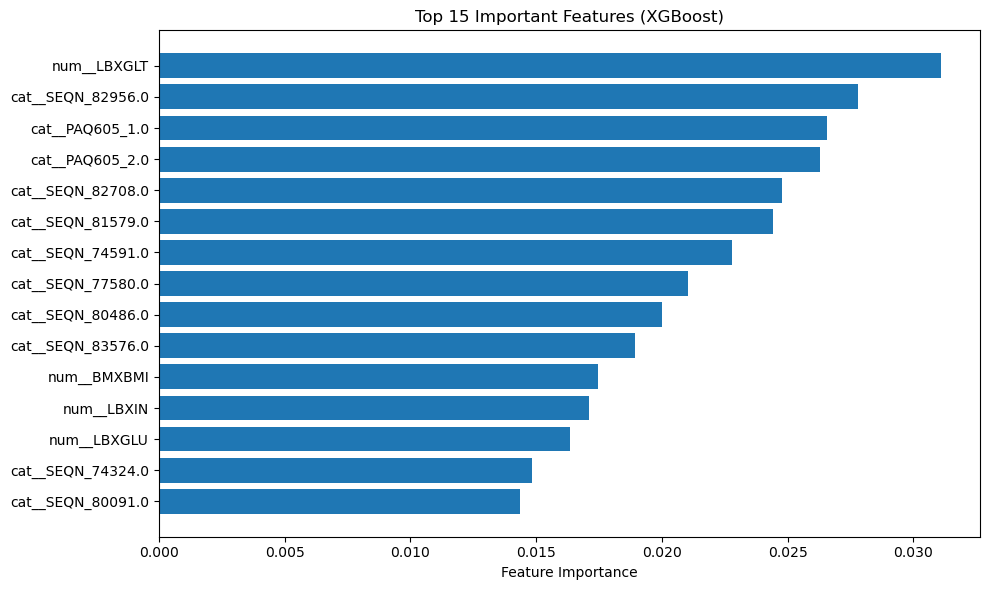

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Get importances from your trained model
importances = xgb_model.feature_importances_

# Create a sorted DataFrame
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['feature'][:15][::-1], feat_imp_df['importance'][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features (XGBoost)")
plt.tight_layout()
plt.show()



In [60]:
from sklearn.feature_selection import SelectFromModel

# Create selector based on importance (keep top N)
selector = SelectFromModel(xgb_model, threshold=-np.inf, max_features=10, prefit=True)

# Transform the train/test sets
X_train_selected = selector.transform(X_train_rf)
X_test_selected = selector.transform(X_test_rf)

# Retrain XGBoost on selected features
xgb_model_selected = XGBClassifier(
    eval_metric='mlogloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
xgb_model_selected.fit(X_train_selected, y_train_rf_encoded)

# Predict and evaluate
xgb_pred_selected = xgb_model_selected.predict(X_test_selected)
xgb_pred_selected_decoded = le.inverse_transform(xgb_pred_selected)

print("XGBoost with Selected Features Classification Report:")
print(classification_report(y_test_rf, xgb_pred_selected_decoded))


XGBoost with Selected Features Classification Report:
              precision    recall  f1-score   support

       Adult       0.88      0.70      0.78       382
      Senior       0.25      0.50      0.33        74

    accuracy                           0.67       456
   macro avg       0.56      0.60      0.55       456
weighted avg       0.78      0.67      0.71       456



In [ ]:
#oldy 
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode y if it's strings like 'Adult', 'Teen', etc.
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Converts strings to ints (e.g., 'Adult' ➝ 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy:.2f}")


Classification Accuracy: 0.83


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Re-standardize the full dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This is now your full standardized feature set

# Re-initialize model (optional but good practice)
clf = LogisticRegression(max_iter=1000)

# Run cross-validation
scores = cross_val_score(clf, X_scaled, y_encoded, cv=5)
print(f"Cross-validated accuracy: {scores.mean():.2f}")

Cross-validated accuracy: 0.84
